In [1]:
!pip install mlrose
!pip install -e git+git://github.com/hiive/mlrose#egg=mlrose-hiive

Obtaining mlrose-hiive from git+git://github.com/hiive/mlrose#egg=mlrose-hiive
  Updating c:\users\gwénolé\desktop\georgia tech\cs 7641\assigment 2\src\mlrose-hiive clone
  Found existing installation: mlrose-hiive 1.2.0-ga
    Uninstalling mlrose-hiive-1.2.0-ga:
      Successfully uninstalled mlrose-hiive-1.2.0-ga
  Running setup.py develop for mlrose-hiive


In [2]:
import mlrose
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
import time

### Data loading and pre-processing

In [3]:
# change the following path
file = r".\dataset.csv"

def load_phishing_data(filename):
    """
    Loads the Phishing website dataset 
    :param filename: path to csv file
    :return: X (data) and y (labels)
    """

    data = pd.read_csv(filename,delimiter=",")
    # y includes our labels and x includes our features
    y = data.Result 
    # "Result" as it is the label
    to_drop = ['index','Result']

    
    X = data.drop(to_drop, axis=1)
    X=X.values
    y = y.values
    

    y = y.astype(int)
    return X, y
X,y = load_phishing_data(file)
print(X[0:3])

for i in range(len(y)):
    if y[i]==-1:
        y[i]=0


[[-1  1  1  1 -1 -1 -1 -1 -1  1  1 -1  1 -1  1 -1 -1 -1  0  1  1  1  1 -1
  -1 -1 -1  1  1 -1]
 [ 1  1  1  1  1 -1  0  1 -1  1  1 -1  1  0 -1 -1  1  1  0  1  1  1  1 -1
  -1  0 -1  1  1  1]
 [ 1  0  1  1  1 -1 -1 -1 -1  1  1 -1  1  0 -1 -1 -1 -1  0  1  1  1  1  1
  -1  1 -1  1  0 -1]]


In [4]:
X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=18)
# Normalize feature data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



C:\Users\Gwénolé\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


# We keep the structure tuned in assigmnent 1
1 hiddend layer and 60 hidden units, for a 'relu' activation function

In [375]:
learning_rates = [0.2,0.1, 0.01, 0.001, 0.0001]
accuracy_test = []
accuracy_train = []
for i in range(len(learning_rates)):
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [60], activation = 'relu', algorithm = 'random_hill_climb',
                                     max_iters = 5000, bias = True, is_classifier = True, learning_rate = learning_rates[i], 
                                     early_stopping = True, clip_max = 5, max_attempts =100, random_state = 18)

    nn_model1.fit(X_train_scaled, y_train)

    # Predict labels for train set and assess accuracy
    y_train_pred = nn_model1.predict(X_train_scaled)
    accuracy_train.append(accuracy_score(y_train, y_train_pred))

    y_test_pred = nn_model1.predict(X_test_scaled)
    accuracy_test.append(accuracy_score(y_test, y_test_pred))
# Predict labels for test set and assess accuracy

### Plot of our validation curves

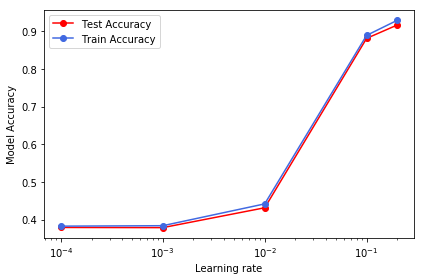

In [376]:
plt.semilogx(learning_rates, accuracy_test, 'o-', color='r', label='Test Accuracy')
plt.semilogx(learning_rates, accuracy_train, 'o-', color = 'royalblue', label='Train Accuracy')
plt.ylabel('Model Accuracy')
plt.xlabel('Learning rate')
plt.legend(loc='best')
plt.tight_layout()
plt.show()  

In [419]:
accuracy_test = []
accuracy_train = []
iterations=[100,500,1000,5000,10000]
fitted_weights = []
loss =[]
training_times=[]
for N in iterations:
    t0 = time.time()
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [60], activation = 'relu', algorithm = 'random_hill_climb',
                                         max_iters = N, bias = True, is_classifier = True, learning_rate = 0.1, 
                                         early_stopping = True, clip_max = 5, max_attempts =100, random_state = 18, restarts = 2)

    nn_model1.fit(X_train_scaled, y_train)
    
    fitted_weights.append(nn_model1.fitted_weights)
    loss.append(nn_model1.loss)
    
    y_train_pred = nn_model1.predict(X_train_scaled)
    accuracy_train.append(accuracy_score(y_train, y_train_pred))

    y_test_pred = nn_model1.predict(X_test_scaled)
    accuracy_test.append(accuracy_score(y_test, y_test_pred))
    training_time=time.time()-t0
    training_times.append(training_time)
    


In [422]:
print(accuracy_test)
accuracy_test_rhc=accuracy_test
print(accuracy_train)
accuracy_train_rhc= accuracy_train
print(fitted_weights)
fitted_weights_rhc = fitted_weights
print(loss)
loss_rhc = loss
print(training_times)
training_times_rhc  =training_times

[0.38285843509724105, 0.44323835368611486, 0.5036182722749887, 0.8887381275440976, 0.919041157847128]
[0.38775817880295493, 0.4622342831298055, 0.5255540479421077, 0.9063772048846676, 0.9359264284637419]
[array([ 0.30074848,  0.01090675,  0.75720294, ..., -0.5215647 ,
        0.03118157, -0.18125704]), array([ 0.30074848,  0.01090675,  0.75720294, ..., -0.5215647 ,
        0.03118157, -0.18125704]), array([ 0.40074848,  0.01090675,  0.75720294, ..., -0.5215647 ,
        0.03118157, -0.18125704]), array([ 0.40074848,  0.01090675,  0.85720294, ..., -0.7215647 ,
       -0.06881843, -0.28125704]), array([ 0.30074848,  0.11090675,  0.85720294, ..., -0.7215647 ,
       -0.56881843, -0.28125704])]
[2.249345493301239, 1.6943857562294036, 1.3085415873163178, 0.24037899339981353, 0.1635263076281788]
[5.4396071434021, 27.30411124229431, 56.76453471183777, 283.41123485565186, 535.6130492687225]


[0.38775817880295493, 0.4622342831298055, 0.5255540479421077, 0.9063772048846676, 0.9359264284637419]


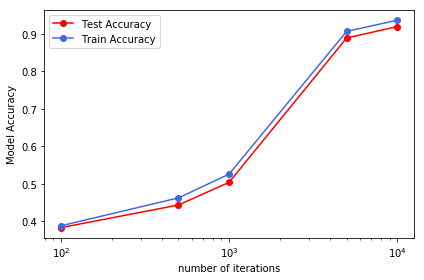

In [424]:
print(accuracy_train)
plt.semilogx(iterations, accuracy_test, 'o-', color='r', label='Test Accuracy')
plt.semilogx(iterations, accuracy_train, 'o-', color = 'royalblue', label='Train Accuracy')
plt.ylabel('Model Accuracy')
plt.xlabel('number of iterations')
plt.legend(loc='best')
plt.tight_layout()
plt.show()  



In [379]:
print(training_time)

534.825954914093


In [6]:
accuracy_test = []
accuracy_train = []
seeds=[1,75,18,33]
fitted_weights = []
loss =[]
training_times=[]
for N in seeds:
    t0 = time.time()
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [60], activation = 'relu', algorithm = 'random_hill_climb',
                                         max_iters = 10000, bias = True, is_classifier = True, learning_rate = 0.1, 
                                         early_stopping = True, clip_max = 5, max_attempts =100, random_state = N, restarts = 5)

    nn_model1.fit(X_train_scaled, y_train)
    
    fitted_weights.append(nn_model1.fitted_weights)
    loss.append(nn_model1.loss)
    
    y_train_pred = nn_model1.predict(X_train_scaled)
    accuracy_train.append(accuracy_score(y_train, y_train_pred))

    y_test_pred = nn_model1.predict(X_test_scaled)
    accuracy_test.append(accuracy_score(y_test, y_test_pred))
    training_time=time.time()-t0
    training_times.append(training_time)
    


In [7]:
print(accuracy_test)
accuracy_test_rhc=accuracy_test
print(accuracy_train)
accuracy_train_rhc= accuracy_train
print(fitted_weights)
fitted_weights_rhc = fitted_weights
print(loss)
loss_rhc = loss
print(training_times)
training_times_rhc  =training_times

[0.9292175486205337, 0.9296698326549073, 0.9289914066033469, 0.927860696517413]
[0.9342680536710387, 0.932157394843962, 0.9345695763606211, 0.9372832805668626]
[array([-0.26595599,  0.44064899, -1.19977125, ...,  0.10401568,
       -0.04919307,  0.72144247]), array([ 0.23788044, -0.66807154,  0.87622134, ...,  0.22764713,
        0.44956956, -0.59690865]), array([ 0.40074848, -0.08909325,  0.85720294, ..., -0.6215647 ,
       -0.36881843, -0.28125704]), array([-0.60297975, -0.20004916, -0.07811839, ..., -0.43037126,
        0.11972378, -0.34071651])]
[0.16241858350225646, 0.1651581105044757, 0.1701568120634763, 0.1576370172403073]
[1002.2495098114014, 1062.3985414505005, 1068.6854870319366, 1061.8381021022797]


[0.9342680536710387, 0.932157394843962, 0.9345695763606211, 0.9372832805668626] [0.9292175486205337, 0.9296698326549073, 0.9289914066033469, 0.927860696517413]


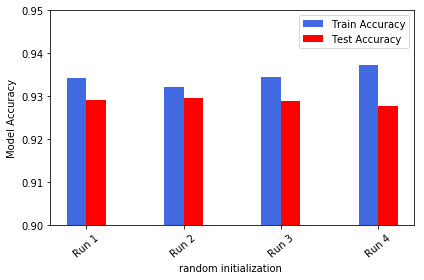

In [31]:
import pylab
print(accuracy_train, accuracy_test)
width = 0.2
plt.bar( [0,1,2,3], accuracy_train, width,color = 'royalblue', label='Train Accuracy')

plt.bar([0.2,1.2,2.2,3.2], accuracy_test,width,  color='r', label='Test Accuracy')
plt.ylabel('Model Accuracy')
plt.xlabel('random initialization ')
plt.ylim(0.9,0.95) # Modifier les limites sur y
pylab.xticks([0.1,1.1,2.1,3.1], ['Run 1','Run 2','Run 3','Run 4'], rotation=40)

plt.legend(loc='best')
plt.tight_layout()
plt.show()  

###  Simulate Annealing algorithm

In [386]:
learning_rates = [0.5,0.2,0.1, 0.01, 0.001, 0.0001]
accuracy_test = []
accuracy_train = []


for i in range(len(learning_rates)):
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [60], activation = 'relu', algorithm = 'simulated_annealing',
                                     max_iters = 5000, bias = True, is_classifier = True, learning_rate = learning_rates[i], 
                                     early_stopping = True, clip_max = 5, max_attempts =100, random_state = 18)

    nn_model1.fit(X_train_scaled, y_train)

    # Predict labels for train set and assess accuracy
    y_train_pred = nn_model1.predict(X_train_scaled)
    accuracy_train.append(accuracy_score(y_train, y_train_pred))

    y_test_pred = nn_model1.predict(X_test_scaled)
    accuracy_test.append(accuracy_score(y_test, y_test_pred))
# Predict labels for test set and assess accuracy

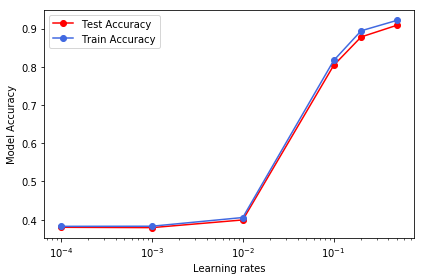

In [387]:
plt.semilogx(learning_rates, accuracy_test, 'o-', color='r', label='Test Accuracy')
plt.semilogx(learning_rates, accuracy_train, 'o-', color = 'royalblue', label='Train Accuracy')
plt.ylabel('Model Accuracy')
plt.xlabel('Learning rates')
plt.legend(loc='best')
plt.tight_layout()
plt.show()  


In [433]:
accuracy_test = []
accuracy_train = []
decays=[0.001,0.005,0.01,0.5]
fitted_weights = []
loss =[]
training_times=[]
for N in decays:
    schedule = mlrose.ExpDecay(init_temp=1.0,exp_const=N,min_temp=0.001)
    t0 = time.time()
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [60], activation = 'relu', algorithm = 'simulated_annealing',
                                     max_iters = 5000, is_classifier = True, learning_rate = 0.5, 
                                     early_stopping = True, clip_max = 5, max_attempts =100, random_state = 18,
                                    schedule =schedule)
    nn_model1.fit(X_train_scaled, y_train)
    
    fitted_weights.append(nn_model1.fitted_weights)
    loss.append(nn_model1.loss)
    
    y_train_pred = nn_model1.predict(X_train_scaled)
    accuracy_train.append(accuracy_score(y_train, y_train_pred))
    y_test_pred = nn_model1.predict(X_test_scaled)
    accuracy_test.append(accuracy_score(y_test, y_test_pred))
    training_time=time.time()-t0
    training_times.append(training_time)

print(accuracy_test,accuracy_train)

[0.8385345997286295, 0.9118046132971506, 0.9154228855721394, 0.9165535956580733] [0.844263530830695, 0.9176843057440073, 0.9175335443992161, 0.9208502939846224]


In [435]:
training_times_sa=training_times
print(training_times_sa)
fitted_weights_sa=fitted_weights
accuracy_test_sa=accuracy_test
accuracy_train_sa=accuracy_train

[155.02228498458862, 135.98321914672852, 134.50150060653687, 126.1487386226654]


[0.8385345997286295, 0.9118046132971506, 0.9154228855721394, 0.9165535956580733] [0.844263530830695, 0.9176843057440073, 0.9175335443992161, 0.9208502939846224]


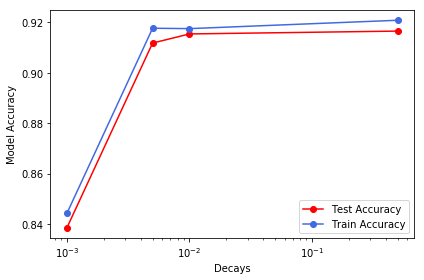

In [437]:
print(accuracy_test,accuracy_train)
plt.semilogx(decays, accuracy_test, 'o-', color='r', label='Test Accuracy')
plt.semilogx(decays, accuracy_train, 'o-', color = 'royalblue', label='Train Accuracy')
plt.ylabel('Model Accuracy')
plt.xlabel('Decays')
plt.legend(loc='best')
plt.tight_layout()
plt.show()  

In [389]:
accuracy_test = []
accuracy_train = []
iterations=[100,500,1000,5000,10000]
fitted_weights = []
loss =[]
training_times=[]
for N in iterations:
    t0 = time.time()
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [60], activation = 'relu', algorithm = 'simulated_annealing',
                                     max_iters = N, bias = True, is_classifier = True, learning_rate = 0.5, 
                                     early_stopping = True, clip_max = 5, max_attempts =100, random_state = 18)
    nn_model1.fit(X_train_scaled, y_train)
    
    fitted_weights.append(nn_model1.fitted_weights)
    loss.append(nn_model1.loss)
    
    y_train_pred = nn_model1.predict(X_train_scaled)
    accuracy_train.append(accuracy_score(y_train, y_train_pred))

    y_test_pred = nn_model1.predict(X_test_scaled)
    accuracy_test.append(accuracy_score(y_test, y_test_pred))
    training_time=time.time()-t0
    training_times.append(training_time)
    


[0.43803708729081864, 0.5160560832202623, 0.7914970601537765, 0.9093170511080959, 0.9047942107643601] [0.4465551032715212, 0.5361073420774913, 0.8073270013568521, 0.9220563847429519, 0.9222071460877431]


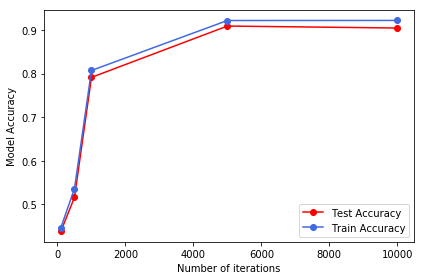

In [391]:
print(accuracy_test,accuracy_train)
plt.plot(iterations, accuracy_test, 'o-', color='r', label='Test Accuracy')
plt.plot(iterations, accuracy_train, 'o-', color = 'royalblue', label='Train Accuracy')
plt.ylabel('Model Accuracy')
plt.xlabel('Number of iterations')
plt.legend(loc='best')
plt.tight_layout()
plt.show()  


In [10]:
accuracy_test = []
accuracy_train = []
seeds = [1,15, 38, 63]
fitted_weights = []
loss =[]
training_times=[]
for N in seeds:
    t0 = time.time()
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [60], activation = 'relu', algorithm = 'simulated_annealing',
                                     max_iters = 10000, bias = True, is_classifier = True, learning_rate = 0.5, 
                                     early_stopping = True, clip_max = 5, max_attempts =100, random_state = N)
    nn_model1.fit(X_train_scaled, y_train)
    
    fitted_weights.append(nn_model1.fitted_weights)
    loss.append(nn_model1.loss)
    
    y_train_pred = nn_model1.predict(X_train_scaled)
    accuracy_train.append(accuracy_score(y_train, y_train_pred))

    y_test_pred = nn_model1.predict(X_test_scaled)
    accuracy_test.append(accuracy_score(y_test, y_test_pred))
    training_time=time.time()-t0
    training_times.append(training_time)
    

[0.9274084124830394, 0.9231117141564903, 0.9226594301221167, 0.9183627317955676] [0.9301974973616765, 0.9235639981908639, 0.9196442032262928, 0.9222071460877431]
[985.8856871128082, 308.5140538215637, 288.91728353500366, 276.7585492134094]


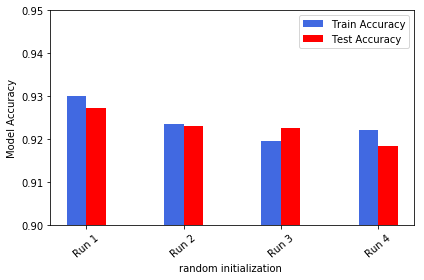

In [14]:
import pylab
print(accuracy_test,accuracy_train)
print(training_times)
width = 0.2
plt.bar( [0,1,2,3], accuracy_train, width,color = 'royalblue', label='Train Accuracy')

plt.bar([0.2,1.2,2.2,3.2], accuracy_test,width,  color='r', label='Test Accuracy')
plt.ylabel('Model Accuracy')
plt.xlabel('random initialization ')
plt.ylim(0.9,0.95) # Modifier les limites sur y
pylab.xticks([0.1,1.1,2.1,3.1], ['Run 1','Run 2','Run 3','Run 4'], rotation=40)

plt.legend(loc='best')
plt.tight_layout()
plt.show()  

###  Genetic algorithm

In [35]:
learning_rates = [0.2,0.1, 0.01, 0.001, 0.0001]
accuracy_test = []
accuracy_train = []
for i in range(len(learning_rates)):
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [60], activation = 'relu', algorithm = 'genetic_alg',
                                     max_iters = 100, bias = True, is_classifier = True, learning_rate = learning_rates[i], 
                                     early_stopping = True, clip_max = 5, max_attempts =100, random_state = 18, pop_size =1000)

    nn_model1.fit(X_train_scaled, y_train)

    # Predict labels for train set and assess accuracy
    y_train_pred = nn_model1.predict(X_train_scaled)
    accuracy_train.append(accuracy_score(y_train, y_train_pred))

    y_test_pred = nn_model1.predict(X_test_scaled)
    accuracy_test.append(accuracy_score(y_test, y_test_pred))
# Predict labels for test set and assess accuracy
print(accuracy_test,accuracy_train)

KeyboardInterrupt: 

[0.7872003618272275, 0.7872003618272275, 0.7872003618272275, 0.7872003618272275, 0.7872003618272275] [0.7889341172923262, 0.7889341172923262, 0.7889341172923262, 0.7889341172923262, 0.7889341172923262]


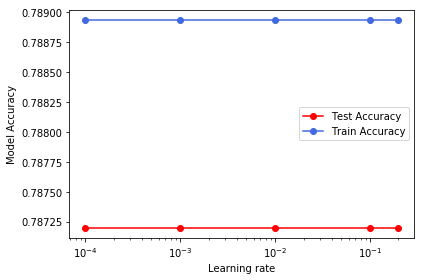

In [412]:
print(accuracy_test,accuracy_train)
plt.semilogx(learning_rates, accuracy_test, 'o-', color='r', label='Test Accuracy')
plt.semilogx(learning_rates, accuracy_train, 'o-', color = 'royalblue', label='Train Accuracy')
plt.ylabel('Model Accuracy')
plt.xlabel('Learning rate')
plt.legend(loc='best')
plt.tight_layout()
plt.show()  


### the learning rates does not impact the training of the algorithm

## Tuning of the population size

In [81]:
N = len(X_train)
pop_sizes = [100,200,400,int(0.1*N), 1000, int(0.20*N), int(0.25*N)]

accuracy_test=[]
accuracy_train=[]
for size in pop_sizes :
        nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [60], activation = 'relu', algorithm = 'genetic_alg',
                                         max_iters = 100, bias = True, is_classifier = True, learning_rate = 0.1, 
                                         early_stopping = True, clip_max = 10, max_attempts =100, random_state = 18, 
                                         pop_size = size)

        nn_model1.fit(X_train_scaled, y_train)

        y_train_pred = nn_model1.predict(X_train_scaled)
        accuracy_train.append(accuracy_score(y_train, y_train_pred))

        y_test_pred = nn_model1.predict(X_test_scaled)
        accuracy_test.append(accuracy_score(y_test, y_test_pred))
    

In [408]:
#let's write the values not to run the code again
accuracy_train=[0.783355947535052, 0.7901402080506558, 0.7952660937735565,0.8287351123172019, 0.8441127694859039,
                  0.8017488315995779, 0.8023518769787427]
accuracy_test=[0.7835820895522388, 0.7797376752600633, 0.7813206693803709, 0.836951605608322,0.845771144278607,
                 0.8023518769787427, 0.8057440072365446]
N = len(X_train)
pop_sizes1 = [100,200,400,int(0.1*N), 1000, int(0.20*N), int(0.25*N)]

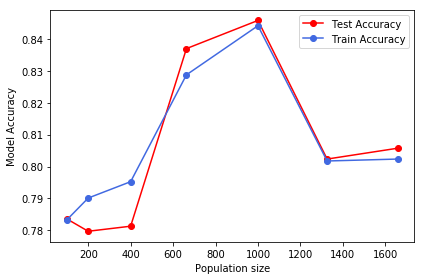

In [409]:
plt.plot(pop_sizes1, accuracy_test1, 'o-', color='r', label='Test Accuracy')
plt.plot(pop_sizes1, accuracy_train1, 'o-', color = 'royalblue', label='Train Accuracy')
plt.ylabel('Model Accuracy')
plt.xlabel('Population size')
plt.legend(loc='best')
plt.tight_layout()
plt.show()  

#### The best accuracy is obtained for a population size of 1000 individuals

# Tuning of the mutation prob

In [204]:
mutation_probs = [0.01, 0.05, 0.1, 0.5]
accuracy_test=[]
accuracy_train=[]
for mutation_proba in mutation_probs:
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [60], activation = 'relu', algorithm = 'genetic_alg',
                                         max_iters = 100, bias = True, is_classifier = True, learning_rate = 0.2, 
                                         early_stopping = True, clip_max = 10, max_attempts =100, random_state = 18, 
                                         pop_size = 1000, mutation_prob=mutation_proba)


    nn_model1.fit(X_train_scaled, y_train)
    # Predict labels for train set and assess accuracy
    y_train_pred = nn_model1.predict(X_train_scaled)
    y_train_accuracy = accuracy_score(y_train, y_train_pred)
    accuracy_train.append(y_train_accuracy)

    y_test_pred = nn_model1.predict(X_test_scaled)
    y_test_accuracy = accuracy_score(y_test, y_test_pred)
    accuracy_test.append(y_test_accuracy)
    # Predict labels for test set and assess accuracy

In [206]:
print(accuracy_test)
print(accuracy_train)

[0.8326549072817729, 0.8170511080958842, 0.845771144278607, 0.8145635459068294]
[0.8305442484546962, 0.8216493291120157, 0.8441127694859039, 0.8273782602140811]


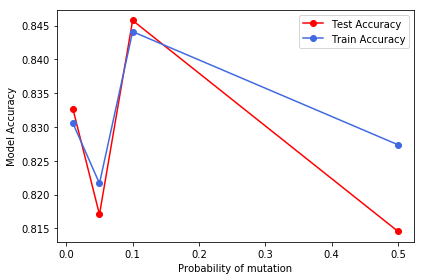

In [207]:
plt.plot(mutation_probs, accuracy_test, 'o-', color='red', label='Test Accuracy')
plt.plot(mutation_probs, accuracy_train, 'o-', color = 'royalblue', label='Train Accuracy')
plt.ylabel('Model Accuracy')
plt.xlabel('Probability of mutation')
plt.legend(loc='best')
plt.tight_layout()
plt.show()  

#### The best configuration is a mutation rate of 0.1 and a population of 1000 individuals

# Let's look at the evolution of the accuracy while increasing the number of iterations

In [5]:
max_iters = [10, 50, 100, 200,500,1000]
accuracy_test = []
accuracy_train = []
fitted_weights = []
loss =[]
training_times=[]

for max_iter in max_iters:
    t0 = time.time()

    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [60], activation = 'relu', algorithm = 'genetic_alg',
                                         max_iters = max_iter, bias = True, is_classifier = True, 
                                         early_stopping = True, max_attempts =100, random_state = 1, 
                                         pop_size = 1000, mutation_prob=0.1, clip_max = 5)


    nn_model1.fit(X_train_scaled, y_train)
    
    fitted_weights.append(nn_model1.fitted_weights)
    loss.append(nn_model1.loss)
    
    training_time=time.time()-t0
    training_times.append(training_time)
    
    # Predict labels for train set and assess accuracy
    y_train_pred = nn_model1.predict(X_train_scaled)
    y_train_accuracy = accuracy_score(y_train, y_train_pred)
    accuracy_train.append(y_train_accuracy)
    print(y_train_accuracy)

    y_test_pred = nn_model1.predict(X_test_scaled)
    y_test_accuracy = accuracy_score(y_test, y_test_pred)
    accuracy_test.append(y_test_accuracy)
    print(y_test_accuracy)

0.772501130710086
0.783355947535052
0.8273782602140811
0.8387607417458164
0.8273782602140811
0.8387607417458164
0.8273782602140811
0.8387607417458164


KeyboardInterrupt: 

[0.783355947535052, 0.8387607417458164, 0.8387607417458164, 0.8387607417458164, 0.8387607417458164, 0.8387607417458164] [0.772501130710086, 0.8273782602140811, 0.8273782602140811, 0.8273782602140811, 0.8273782602140811, 0.8273782602140811]


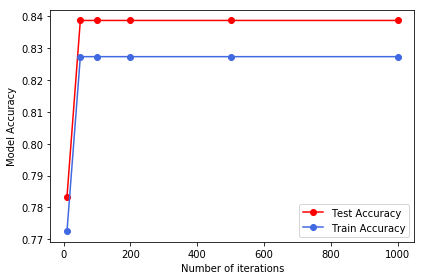

In [38]:
print(accuracy_test,accuracy_train)

plt.plot(max_iters, accuracy_test, 'o-', color='red', label='Test Accuracy')
plt.plot(max_iters, accuracy_train, 'o-', color = 'royalblue', label='Train Accuracy')
plt.ylabel('Model Accuracy')
plt.xlabel('Number of iterations')
plt.legend(loc='best')
plt.tight_layout()
plt.show()  

### The ABAGAIL resuts:
The output of the ABIGAIL Algorithm can be found in the file AbagailResults

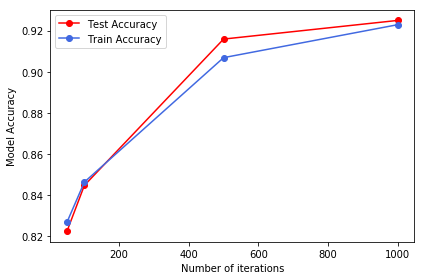

In [42]:
iterations=[50,100,500,1000]

accuracy_test=[0.82243,0.84474, 0.91587, 0.92493]
accuracy_train= [0.82683,0.84634, 0.90684,0.92285]

plt.plot(iterations, accuracy_test, 'o-', color='red', label='Test Accuracy')
plt.plot(iterations, accuracy_train, 'o-', color = 'royalblue', label='Train Accuracy')
plt.ylabel('Model Accuracy')
plt.xlabel('Number of iterations')
plt.legend(loc='best')
plt.tight_layout()
plt.show()  



### Test accuracy comparaison:



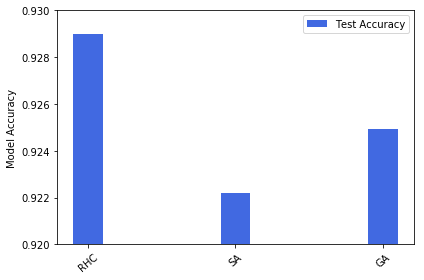

In [32]:
import pylab
a=[0.9289914066033469, 0.9222071460877431, 0.92493 ]

width = 0.2
plt.bar( [0,1,2], a, width,color = 'royalblue', label='Test Accuracy')

plt.ylabel('Model Accuracy')
plt.ylim(0.92,0.93) # Modifier les limites sur y
pylab.xticks([0,1,2], ['RHC','SA','GA'], rotation=40)

plt.legend(loc='best')
plt.tight_layout()
plt.show()  

### Training time comparaison : 

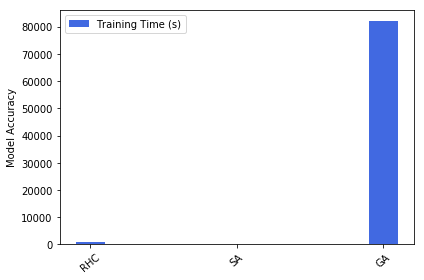

In [36]:
import pylab
time=[1061.8381021022797, 308.5140538215637, 82054.560] #value taken from previous test (see above for SA and RHC, and one the 
                                                        # GA_abagail.txt for the GA )

width = 0.2
plt.bar([0,1,2],time, width,color = 'royalblue', label='Training Time (s)')

plt.ylabel('Model Accuracy')
#plt.lim(0.9,0.95) # Modifier les limites sur y
pylab.xticks([0,1,2], ['RHC','SA','GA'], rotation=40)

plt.legend(loc='best')
plt.tight_layout()
plt.show()  

### Optimization Problems

### N-Queens

In [330]:
fitness = mlrose.Queens()
best_fit_sa=[]
best_fit_ga=[]
best_fit_mimic=[]

training_time_sa=[]
training_time_ga=[]
training_time_mimic=[]


number_of_iterations_sa=[]
number_of_iterations_ga=[]
number_of_iterations_mimic=[]

Nmin=5
Nmax=20

n=list(range(Nmin,Nmax))

for N in range(Nmin,Nmax):
    
    #The N-Queens problem is an example of a discrete-state optimization problem, since each of the elements of 
    # the statevector must take on an integer value in the range 0 to 7
    problem = mlrose.DiscreteOpt(length = N, fitness_fn = fitness, maximize = False, max_val = 8)

    # problem length (i.e. the lengthof the state vector, which is 8 in this case)

    # Define decay schedule
    schedule = mlrose.ExpDecay()


    #Solve the problem using genetic algorithm
    t0 = time.time()
    best_state_sa, best_fitness_sa, fitness_curve_sa = mlrose.simulated_annealing(problem, schedule = schedule,
                        max_attempts = 100, max_iters =10000, random_state = 1, curve = True)
    t1=time.time()-t0
    training_time_sa.append(t1)
    best_fit_sa.append(best_fitness_sa)
    number_of_iterations_sa.append(len(fitness_curve_sa))

    # Solve the problem using simulated annealing
    t0 = time.time()
    best_state_ga, best_fitness_ga, fitness_curve_ga = mlrose.genetic_alg(problem, random_state = 1, curve = True)
    training_time_ga.append(time.time()-t0)
    best_fit_ga.append(best_fitness_ga)
    number_of_iterations_ga.append(len(fitness_curve_ga))
    
    #Solve the problem using MIMIC
    t0 = time.time()
    best_state_mimic, best_fitness_mimic, fitness_curve_mimic = mlrose.mimic(problem, random_state = 1, curve= True)
    training_time_mimic.append(time.time()-t0)
    best_fit_mimic.append(best_fitness_mimic)
    number_of_iterations_mimic.append(len(fitness_curve_mimic))

    


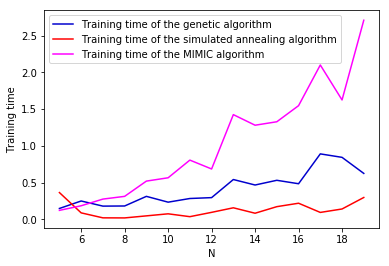

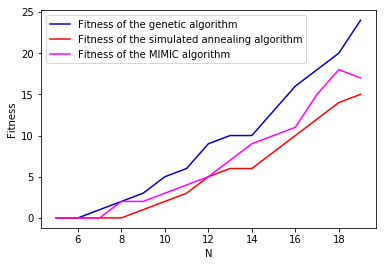

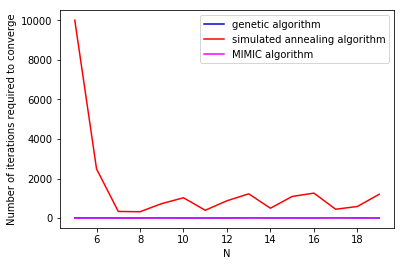

In [331]:
plt.plot(n, training_time_ga, 'mediumblue', label='Training time of the genetic algorithm')
plt.plot(n, training_time_sa, 'r', label='Training time of the simulated annealing algorithm')
plt.plot(n, training_time_mimic, 'magenta', label='Training time of the MIMIC algorithm')
plt.ylabel('Training time')
plt.xlabel('N')
plt.legend(loc='best')
plt.show()

plt.plot(n, best_fit_ga, 'mediumblue', label='Fitness of the genetic algorithm')
plt.plot(n, best_fit_sa, 'r', label='Fitness of the simulated annealing algorithm')
plt.plot(n, best_fit_mimic, 'magenta', label='Fitness of the MIMIC algorithm')
plt.ylabel('Fitness')
plt.xlabel('N')
plt.legend(loc='best')
plt.show()

plt.plot(n, number_of_iterations_ga, 'mediumblue', label='genetic algorithm')
plt.plot(n, number_of_iterations_sa, 'r', label='simulated annealing algorithm')
plt.plot(n, number_of_iterations_mimic, 'magenta', label='MIMIC algorithm')
plt.ylabel('Number of iterations required to converge')
plt.xlabel('N')
plt.legend(loc='best')
plt.show()

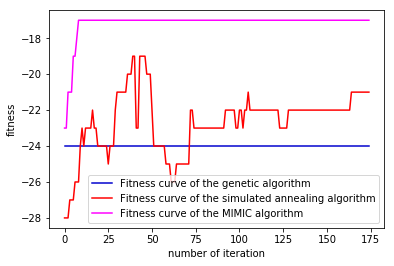

In [183]:
fitness_curve_ga = fitness_curve_ga.tolist()
fitness_curve_sa = fitness_curve_sa.tolist()
fitness_curve_mimic = fitness_curve_mimic.tolist()

maximum=max(len(fitness_curve_ga),len(fitness_curve_sa))
maximum=max(maximum,len(fitness_curve_mimic))
iterations=list(range(maximum))

if len(fitness_curve_ga)<maximum:
    m=fitness_curve_ga[len(fitness_curve_ga)-1]
    for k in range(len(fitness_curve_ga),maximum):
        fitness_curve_ga.append(m)

if len(fitness_curve_sa)<maximum:
    m=fitness_curve_sa[len(fitness_curve_sa)-1]
    for k in range(len(fitness_curve_sa),maximum):
        fitness_curve_sa.append(m)

if len(fitness_curve_mimic)<maximum:
    m=fitness_curve_mimic[len(fitness_curve_mimic)-1]
    for k in range(len(fitness_curve_mimic),maximum):
        fitness_curve_mimic.append(m)

plt.plot(iterations, fitness_curve_ga, 'mediumblue', label='Fitness curve of the genetic algorithm')
plt.plot(iterations, fitness_curve_sa, 'r', label='Fitness curve of the simulated annealing algorithm')
plt.plot(iterations, fitness_curve_mimic, 'magenta', label='Fitness curve of the MIMIC algorithm')
plt.ylabel('fitness')
plt.xlabel('number of iteration')
plt.legend(loc='best')

plt.show()

## 4 peaks

In [234]:
import random as rd

# we can try diffferents values of T
fitness = mlrose.FourPeaks(t_pct=0.1)

best_fit_sa=[]
best_fit_ga=[]
best_fit_mimic=[]

training_time_sa=[]
training_time_ga=[]
training_time_mimic=[]

number_of_iterations_sa=[]
number_of_iterations_ga=[]
number_of_iterations_mimic=[]

Nmin=5
Nmax=50

n=list(range(Nmin,Nmax))
for N in range(Nmin,Nmax):

    problem = mlrose.DiscreteOpt(length = N, fitness_fn = fitness, maximize = True, max_val = 2)

    # Define decay schedule
    schedule = mlrose.ExpDecay()

    # Define  a radom initial state
    ini = []
    for i in range(N):
        ini.append(rd.randint(0,1))
    init_state = np.array(ini)

    #Solve the problem using genetic algorithm
    t0=time.time()
    best_state_sa, best_fitness_sa, fitness_curve_sa = mlrose.simulated_annealing(problem, schedule = schedule,
                        max_attempts = 10, max_iters =1000,init_state = init_state, random_state = 1, curve = True)
    t1=time.time()-t0
    training_time_sa.append(t1)
    best_fit_sa.append(best_fitness_sa)
    number_of_iterations_sa.append(len(fitness_curve_sa))
    
    # Solve the problem using simulated annealing
    t0=time.time()
    best_state_ga, best_fitness_ga, fitness_curve_ga = mlrose.genetic_alg(problem, 
                        max_attempts = 10, max_iters =1000, random_state = 1, curve = True)
    t1=time.time()-t0
    training_time_ga.append(t1)
    best_fit_ga.append(best_fitness_ga)
    number_of_iterations_ga.append(len(fitness_curve_ga))

    #Solve the problem using MIMIC
    t0=time.time()
    best_state_mimic, best_fitness_mimic, fitness_curve_mimic = mlrose.mimic(problem,
                        max_attempts = 10, max_iters =1000, random_state = 1, curve= True)

    t1=time.time()-t0
    training_time_mimic.append(t1)
    best_fit_mimic.append(best_fitness_mimic)
    number_of_iterations_mimic.append(len(fitness_curve_mimic))


In [292]:
fitness = mlrose.FourPeaks(t_pct=0.1)

optimal = []
local_optimum = []
for N in range(Nmin,Nmax):
    state = np.zeros(N)
    local_optimum.append(fitness.evaluate(state))
    T = int(N/10)+2
    for j in range(0,T):
        state[j]=1
    
    optimal.append(fitness.evaluate(state))
 

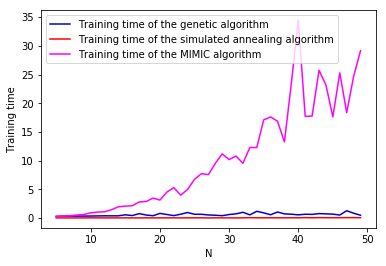

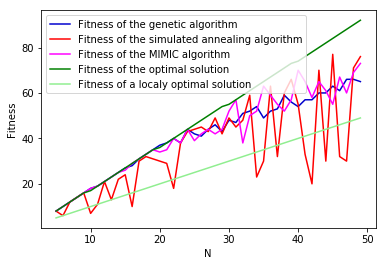

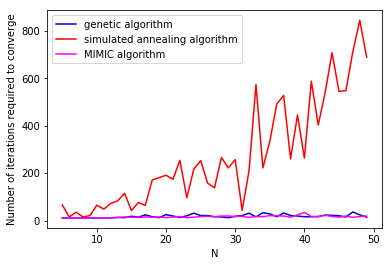

In [291]:
plt.plot(n, training_time_ga, 'mediumblue', label='Training time of the genetic algorithm')
plt.plot(n, training_time_sa, 'r', label='Training time of the simulated annealing algorithm')
plt.plot(n, training_time_mimic, 'magenta', label='Training time of the MIMIC algorithm')
plt.ylabel('Training time')
plt.xlabel('N')
plt.legend(loc='best')
plt.show()

plt.plot(n, best_fit_ga, 'mediumblue', label='Fitness of the genetic algorithm')
plt.plot(n, best_fit_sa, 'r', label='Fitness of the simulated annealing algorithm')
plt.plot(n, best_fit_mimic, 'magenta', label='Fitness of the MIMIC algorithm')
plt.plot(n, optimal, 'green', label='Fitness of the optimal solution')
plt.plot(n, local_optimum, 'lightgreen', label='Fitness of a localy optimal solution')

plt.ylabel('Fitness')
plt.xlabel('N')
plt.legend(loc='best')
plt.show()


plt.plot(n, number_of_iterations_ga, 'mediumblue', label='genetic algorithm')
plt.plot(n, number_of_iterations_sa, 'r', label='simulated annealing algorithm')
plt.plot(n, number_of_iterations_mimic, 'magenta', label='MIMIC algorithm')
plt.ylabel('Number of iterations required to converge')
plt.xlabel('N')
plt.legend(loc='best')
plt.show()

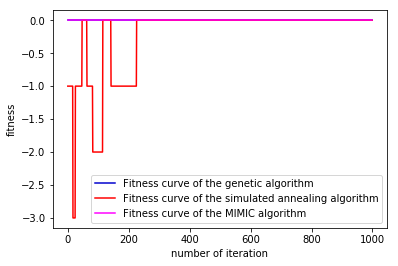

In [186]:
fitness_curve_ga = fitness_curve_ga.tolist()
fitness_curve_sa = fitness_curve_sa.tolist()
fitness_curve_mimic = fitness_curve_mimic.tolist()



maximum=max(len(fitness_curve_ga),len(fitness_curve_sa))
maximum=max(maximum,len(fitness_curve_mimic))
iterations=list(range(maximum))

if len(fitness_curve_ga)<maximum:
    m=fitness_curve_ga[len(fitness_curve_ga)-1]
    for k in range(len(fitness_curve_ga),maximum):
        fitness_curve_ga.append(m)

if len(fitness_curve_sa)<maximum:
    m=fitness_curve_sa[len(fitness_curve_sa)-1]
    for k in range(len(fitness_curve_sa),maximum):
        fitness_curve_sa.append(m)

if len(fitness_curve_mimic)<maximum:
    m=fitness_curve_mimic[len(fitness_curve_mimic)-1]
    for k in range(len(fitness_curve_mimic),maximum):
        fitness_curve_mimic.append(m)

plt.plot(iterations, fitness_curve_ga, 'mediumblue', label='Fitness curve of the genetic algorithm')
plt.plot(iterations, fitness_curve_sa, 'r', label='Fitness curve of the simulated annealing algorithm')
plt.plot(iterations, fitness_curve_mimic, 'magenta', label='Fitness curve of the MIMIC algorithm')
plt.ylabel('fitness')
plt.xlabel('number of iteration')
plt.legend(loc='best')

plt.show()

### The Travelling Salesman optimization problem

In [334]:
import random as rd
m=10 #our map is m*m

best_fit_sa=[]
best_fit_ga=[]
best_fit_mimic=[]

training_time_sa=[]
training_time_ga=[]
training_time_mimic=[]


number_of_iterations_sa=[]
number_of_iterations_ga=[]
number_of_iterations_mimic=[]


Nmin=5
Nmax=30



#Note: with some random initializations, the problem has no solution. Yet, it occurs rarely, so we keep it random to avoid 
#introducing bias by selecting coordinates ourselve.


n=list(range(Nmin,Nmax,2))
for N in range(Nmin,Nmax,2):
    coords=[]
    while len(coords)<N:
        x = rd.randint(0,m)
        y = rd.randint(0,m)
        coord = [x,y]
        if coord not in coords:
            coords.append(coord)
    initial_state=coords[0]
    
    fitness = mlrose.TravellingSales(coords=coords)
    
    problem = mlrose.TSPOpt(length = N, coords = coords, maximize=False, fitness_fn = fitness)
    # problem length (i.e. the lengthof the state vector, which is 8 in this case)
    # Define decay schedule
    schedule = mlrose.ExpDecay()


    #Solve the problem using genetic algorithm
    t0=time.time()
    best_state_sa, best_fitness_sa, fitness_curve_sa = mlrose.simulated_annealing(problem, schedule = schedule,
                        max_attempts = 10, max_iters =1000, random_state = 1, curve = True)
    t1=time.time()-t0
    training_time_sa.append(t1)
    best_fit_sa.append(best_fitness_sa)
    number_of_iterations_sa.append(len(fitness_curve_sa))

    # Solve the problem using simulated annealing
    t0=time.time()
    best_state_ga, best_fitness_ga, fitness_curve_ga = mlrose.genetic_alg(problem, 
                        max_attempts = 20, max_iters =1000, random_state = 1, curve = True)
    t1=time.time()-t0
    training_time_ga.append(t1)
    best_fit_ga.append(best_fitness_ga)
    number_of_iterations_ga.append(len(fitness_curve_ga))

    #Solve the problem using MIMIC
    t0=time.time()
    best_state_mimic, best_fitness_mimic, fitness_curve_mimic = mlrose.mimic(problem,
                        max_attempts = 20, max_iters =1000, random_state = 1, curve= True)
    t1=time.time()-t0
    training_time_mimic.append(t1)
    best_fit_mimic.append(best_fitness_mimic)
    number_of_iterations_mimic.append(len(fitness_curve_mimic))




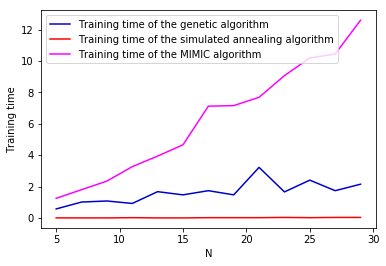

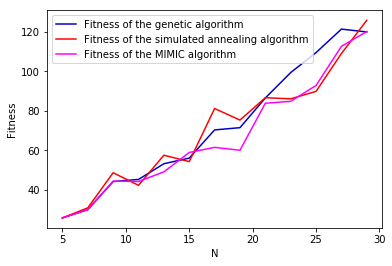

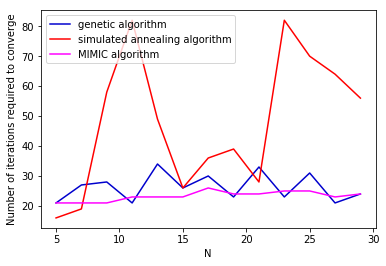

In [335]:
plt.plot(n, training_time_ga, 'mediumblue', label='Training time of the genetic algorithm')
plt.plot(n, training_time_sa, 'r', label='Training time of the simulated annealing algorithm')
plt.plot(n, training_time_mimic, 'magenta', label='Training time of the MIMIC algorithm')
plt.ylabel('Training time')
plt.xlabel('N')
plt.legend(loc='best')
plt.show()

plt.plot(n, best_fit_ga, 'mediumblue', label='Fitness of the genetic algorithm')
plt.plot(n, best_fit_sa, 'r', label='Fitness of the simulated annealing algorithm')
plt.plot(n, best_fit_mimic, 'magenta', label='Fitness of the MIMIC algorithm')
plt.ylabel('Fitness')
plt.xlabel('N')
plt.legend(loc='best')
plt.show()


plt.plot(n, number_of_iterations_ga, 'mediumblue', label='genetic algorithm')
plt.plot(n, number_of_iterations_sa, 'r', label='simulated annealing algorithm')
plt.plot(n, number_of_iterations_mimic, 'magenta', label='MIMIC algorithm')
plt.ylabel('Number of iterations required to converge')
plt.xlabel('N')
plt.legend(loc='best')
plt.show()


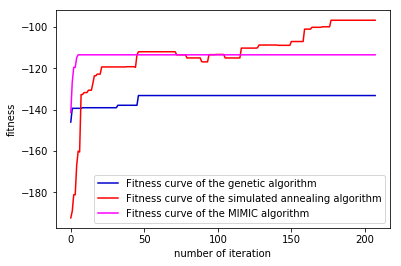

In [338]:
fitness_curve_ga = fitness_curve_ga.tolist()
fitness_curve_sa = fitness_curve_sa.tolist()
fitness_curve_mimic = fitness_curve_mimic.tolist()

maximum=max(len(fitness_curve_ga),len(fitness_curve_sa))
maximum=max(maximum,len(fitness_curve_mimic))
iterations=list(range(maximum))

if len(fitness_curve_ga)<maximum:
    m=fitness_curve_ga[len(fitness_curve_ga)-1]
    for k in range(len(fitness_curve_ga),maximum):
        fitness_curve_ga.append(m)

if len(fitness_curve_sa)<maximum:
    m=fitness_curve_sa[len(fitness_curve_sa)-1]
    for k in range(len(fitness_curve_sa),maximum):
        fitness_curve_sa.append(m)

if len(fitness_curve_mimic)<maximum:
    m=fitness_curve_mimic[len(fitness_curve_mimic)-1]
    for k in range(len(fitness_curve_mimic),maximum):
        fitness_curve_mimic.append(m)

plt.plot(iterations, fitness_curve_ga, 'mediumblue', label='Fitness curve of the genetic algorithm')
plt.plot(iterations, fitness_curve_sa, 'red', label='Fitness curve of the simulated annealing algorithm')
plt.plot(iterations, fitness_curve_mimic, 'magenta', label='Fitness curve of the MIMIC algorithm')
plt.ylabel('fitness')
plt.xlabel('number of iteration')
plt.legend(loc='best')

plt.show()